# Проект. Анализ данных по ДТП за 2018 год.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
data = pd.read_excel('dtp_good.xlsx')

In [116]:
data

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 23:00:00,Понедельник,120.542764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39080,80,Республика Башкортостан,80Н-069,Аскарово - Альмухаметово - Сибай,Региональная или межмуниципальная дорога общег...,"ПФО, Республика Башкортостан, Абзелиловский ра...",Наезд на животное,20180401,1:55:00,Нарушение правил расположения ТС на проезжей ч...,2,0,1,4,2018-04-01 01:55:00,Воскресенье,140.300263
39081,79,Республика Адыгея,отсутствует,Подъезд к а.Вочепший,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Адыгея, Теучежский район",Наезд на животное,20180401,1:30:00,Другие нарушения ПДД водителями,0,1,1,42,2018-04-01 01:30:00,Воскресенье,116.329268
39082,3,Краснодарский край,Р-217,Подъезд к городу Майкоп от а/д Р-217,Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Новокубанский район",Столкновение,20180401,1:00:00,"Выезд на полосу встречного движения в местах, ...",2,0,2,3,2018-04-01 01:00:00,Воскресенье,106.835201
39083,76,Забайкальский край,А-350,Чита - Забайкальск - граница с Китайской Народ...,Федеральная дорога общего пользования,"СФО, Забайкальский край, Читинский район, Ново...",Опрокидывание,20180401,0:30:00,Нарушение правил расположения ТС на проезжей ч...,3,1,1,4,2018-04-01 00:30:00,Воскресенье,110.265314


Расшифровка полей:

'reg_code' - код региона

'рregion_name' - название региона

'road_code' - код дороги

'road_name' - название дороги

'road_type' - тип дороги

'address' - Адрес

'crash_type_name' - тип ДТП

'crash_date' - дата ДТП

'crash_time' - время ДТП

'crash_reason' - причина ДТП

'fatalities_amount' - число погибших

'victims_amount' - число пострадавших

'vehicles_amount' - число транспортных средств

'participants_amount' - число участников

'datetime' - дата и время ДТП

'crash_date_day' - день недели

''wait_time' - время ожидания в минутах

Задача
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:

1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. сследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.


In [117]:
# общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39085 entries, 0 to 39084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   reg_code             39085 non-null  int64         
 1   region_name          39085 non-null  object        
 2   road_code            39085 non-null  object        
 3   road_name            39085 non-null  object        
 4   road_type            39085 non-null  object        
 5   address              39085 non-null  object        
 6   crash_type_name      39085 non-null  object        
 7   crash_date           39085 non-null  int64         
 8   crash_time           39085 non-null  object        
 9   crash_reason         39085 non-null  object        
 10  fatalities_amount    39085 non-null  int64         
 11  victims_amount       39085 non-null  int64         
 12  vehicles_amount      39085 non-null  int64         
 13  participants_amount  39085 non-

 Сколько всего случаев ДТП?

In [118]:
# размер датасета
data.shape

(39085, 17)

<b>1. Найдем регионы с наибольшей аварийностью.

Посмотрим как они распределены по регионам

In [119]:
dtp_count = data['region_name'].value_counts().sort_values(ascending=True)
dtp_count

Республика Ингушетия                 82
Магаданская область                  82
Ямало-Ненецкий автономный округ      86
Томская область                      89
Севастополь                          90
                                   ... 
Ставропольский край                 956
Республика Башкортостан            1075
Ленинградская область              1425
Краснодарский край                 2294
Московская область                 2764
Name: region_name, Length: 83, dtype: int64

Добавим в dtp_count относительные значения.Реализуем график, добив относительные значения в процентах.



In [120]:
dtp_count = data['region_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count.columns = ['region_name', 'dtp_count']

In [121]:
dtp_count

,region_name,dtp_count
0,Республика Ингушетия,82
1,Магаданская область,82
2,Ямало-Ненецкий автономный округ,86
3,Томская область,89
4,Севастополь,90
...,...,...
78,Ставропольский край,956
79,Республика Башкортостан,1075
80,Ленинградская область,1425
81,Краснодарский край,2294


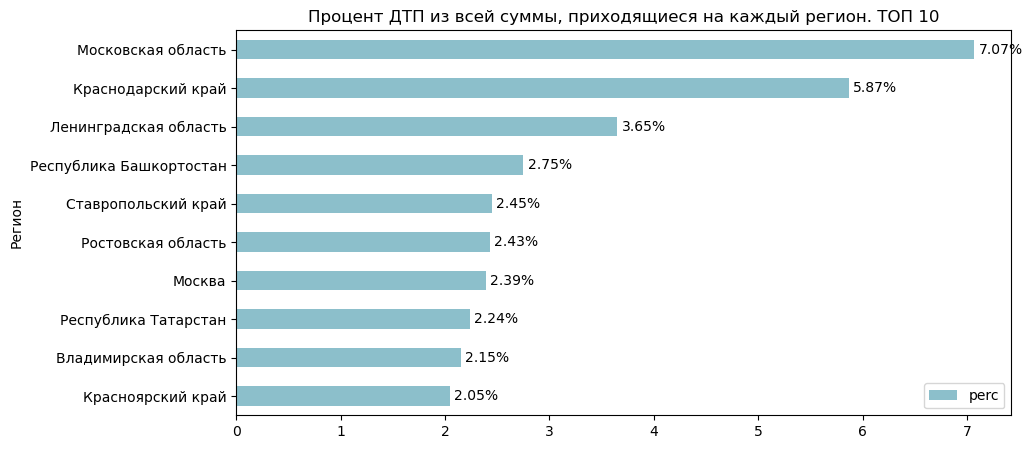

In [122]:
dtp_count['perc'] = (dtp_count['dtp_count'] / dtp_count['dtp_count'].sum() * 100).round(2)
ax = dtp_count.tail(10).plot(kind ='barh',
                             figsize=(10,5),
                             title ='Процент ДТП из всей суммы, приходящиеся на каждый регион. ТОП 10',
                             ylabel='Процент',
                             xlabel='Регион',
                             legend =True,
                             x='region_name',
                             y='perc',
                            color=(0.1, 0.5, 0.6, 0.5))

ax.bar_label(ax.containers[0], fmt='%.2f%%',padding=3)
plt.show()

В лидерах вовсе не Москва и не Санкт-Петербург, как мы могли предположить. Неожиданный результат всегда настораживает, возможно в данных есть ошибка или аномалии, которые не были обнаружены на этапе предобработки, а может быть с данным все в порядке и продолжив исследование мы найдем причину.


<b>2. Определим распределение числа ДТП по типам дорог, по видам ДТП.

У нас два типа дорог. Построим диаграмму распределения числа ДТП для каждого типа.

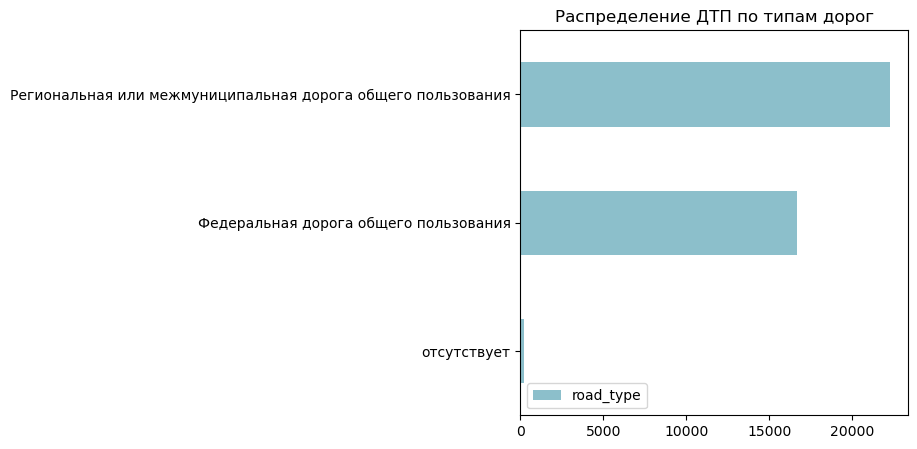

In [123]:
dtp_count_road = data['road_type'].value_counts().sort_values(ascending=True)
dtp_count_road
dtp_count_road.tail(10).plot(kind='barh',
                        figsize=(5,5),
                        title='Распределение ДТП по типам дорог',
                        legend='False',
                        color=(0.1, 0.5, 0.6, 0.5))

plt.show()

Наибольшее число ДТП происходит на региональных или межмуниципальных дорогах общего пользования.

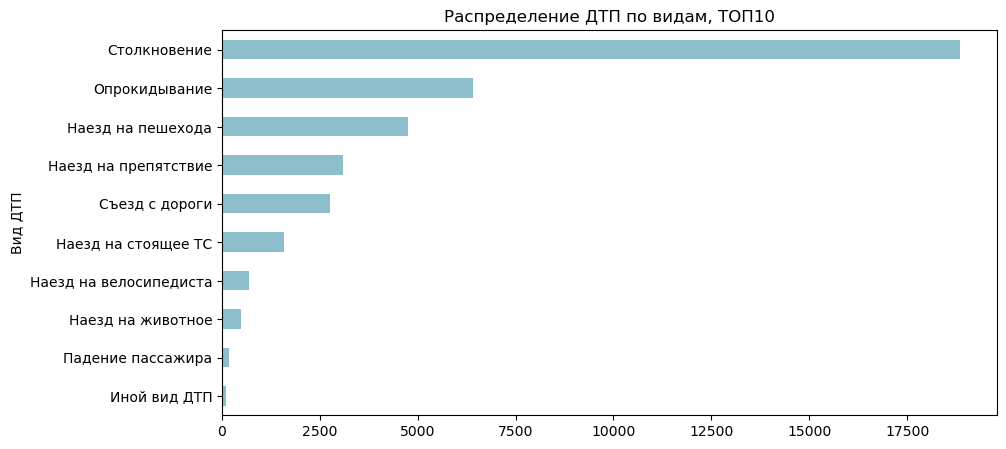

In [124]:
dtp_type_name = data['crash_type_name'].value_counts().sort_values(ascending=True)
dtp_type_name.tail(10).plot(kind='barh',
                        figsize=(10,5),
                        title='Распределение ДТП по видам, ТОП10',
                        ylabel='Число ДТП',
                        xlabel='Вид ДТП',
                        color=(0.1, 0.5, 0.6, 0.5))
plt.show()

Наиболее частый вид ДТП - столкновение.

<b>3. Исследуем зависимость числа ДТП от дня недели.


Построим линейный график числа ДТП по дням недели (от понедельника к воскресенью).

<AxesSubplot:title={'center':'Число ДТП по дням недели'}>

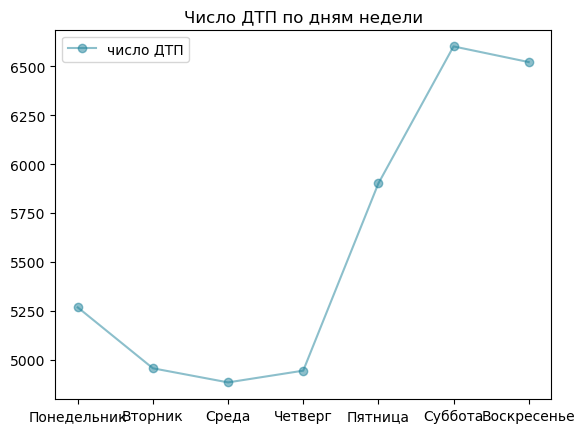

In [125]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
dtp_type_name = data['crash_date_day'].value_counts()
dtp_type_name

columns_names = ['city', 'name', 'code']
dtp_week = pd.DataFrame({'число ДТП': dtp_type_name},index=days)
dtp_week.plot(style='o-',color=(0.1, 0.5, 0.6, 0.5), title='Число ДТП по дням недели')

По графику видно, что наибольшее число ДТП происходит по выходным дням и в пятницу. Самый частый день ДТП - суббота.


<b>4. Определим регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.


Определим топ-5 регионов с наибольшим среднем значением числа погибших, числа пострадаших, числа транспортных средств, числа участников. Выведим на экран сводные таблицы и столбчатые диаграммы в цикле. Дополним код выводом названий графиков на русском языке.


In [126]:
#наибольшее среднее число погибших
dtp_fatalities = data.pivot_table(index='region_name',
                            aggfunc='mean', 
                           values='fatalities_amount')
dtp_fatalities = dtp_fatalities.sort_values(by='fatalities_amount',ascending=False)
dtp_fatalities.reset_index(inplace=True)
dtp_fatalities.columns=['region_name','fatalities_amount_mean']
dtp_fatalities.head(5)

,region_name,fatalities_amount_mean
0,Республика Ингушетия,1.987805
1,Республика Тыва,1.942308
2,Республика Калмыкия,1.867816
3,Республика Дагестан,1.837037
4,Волгоградская область,1.798419


In [127]:
#наибольшее среднее число постадавших
dtp_victims = data.pivot_table(index='region_name',
                            aggfunc='mean', 
                           values='victims_amount')
dtp_victims = dtp_victims.sort_values(by='victims_amount',ascending=False)
dtp_victims.reset_index(inplace=True)
dtp_victims.columns=['region_name','victims_amount_mean']
dtp_victims.head(5)

,region_name,victims_amount_mean
0,Чеченская Республика,0.484536
1,Кабардино-Балкарская Республика,0.406504
2,Республика Ингушетия,0.353659
3,Ульяновская область,0.343972
4,Ростовская область,0.322785


In [128]:
#наибольшее среднее число транспортных средств
dtp_vehicles = data.pivot_table(index='region_name',
                            aggfunc='mean', 
                           values='vehicles_amount')
dtp_vehicles = dtp_vehicles.sort_values(by='vehicles_amount',ascending=False)
dtp_vehicles.reset_index(inplace=True)
dtp_vehicles.columns=['region_name','vehicles_amount_mean']
dtp_vehicles.head(5)

,region_name,vehicles_amount_mean
0,Санкт-Петербург,2.357955
1,Москва,2.212219
2,Волгоградская область,2.173913
3,Новосибирская область,2.024283
4,Воронежская область,1.975806


In [129]:
#наибольшее среднее число участников
dtp_participants = data.pivot_table(index='region_name',
                            aggfunc='mean', 
                           values='participants_amount')
dtp_participants = dtp_participants.sort_values(by='participants_amount',ascending=False)
dtp_participants.reset_index(inplace=True)
dtp_participants.columns=['region_name','participants_amount_mean']
dtp_participants.head(5)

,region_name,participants_amount_mean
0,Магаданская область,5.451220
1,Псковская область,5.428144
2,Костромская область,5.396104
3,Республика Алтай,5.384615
4,Мурманская область,5.217054


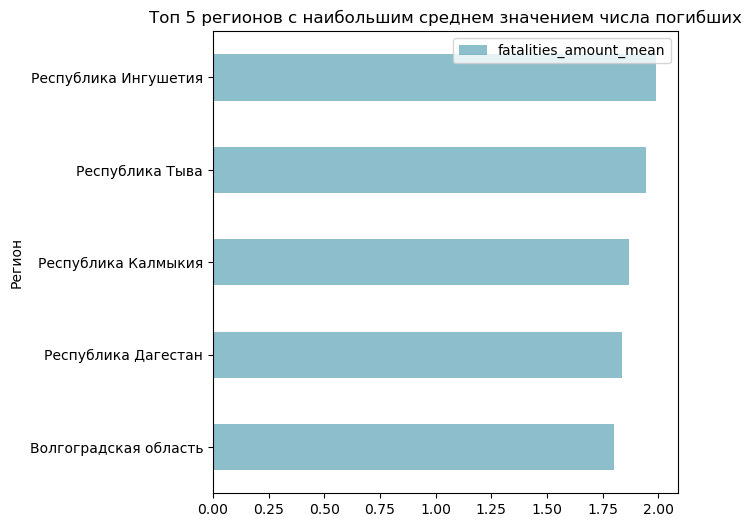

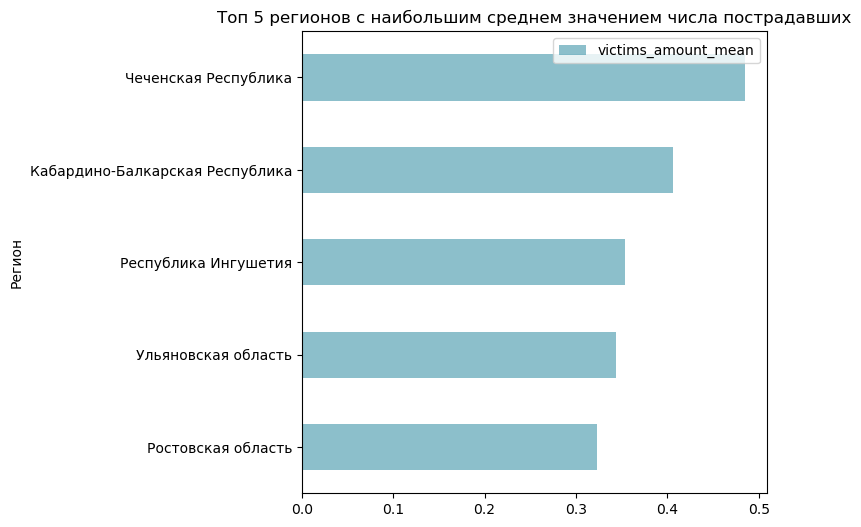

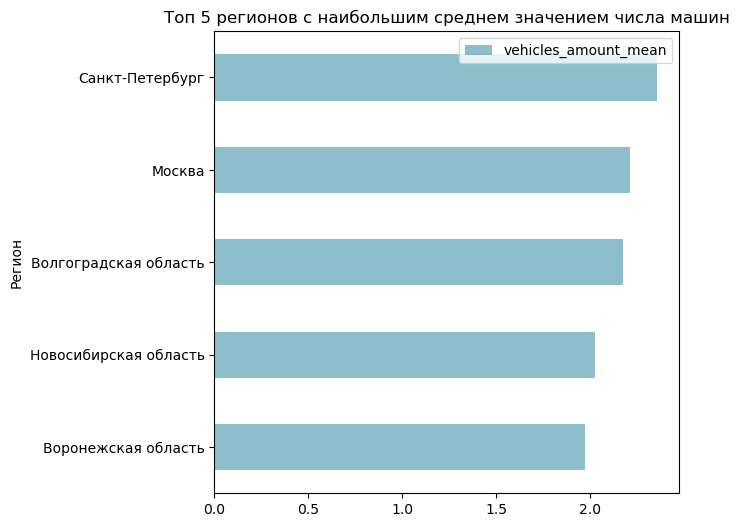

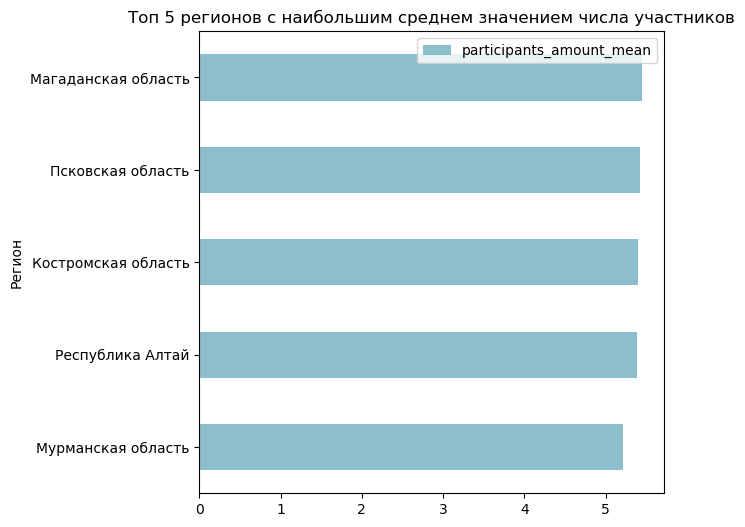

In [130]:
#отразим результаты DataFrame на графиках
dtp = [dtp_fatalities, dtp_victims, dtp_vehicles, dtp_participants]
typ = ['fatalities_amount_mean', 'victims_amount_mean', 'vehicles_amount_mean', 'participants_amount_mean']
title =['Топ 5 регионов с наибольшим среднем значением числа погибших', 'Топ 5 регионов с наибольшим среднем значением числа пострадавших', 'Топ 5 регионов с наибольшим среднем значением числа машин', 'Топ 5 регионов с наибольшим среднем значением числа участников']
count = 0 
for i in dtp:
    i.sort_values(by=typ[count], ascending=True).tail(5).plot(kind='barh',
        x='region_name',
        y=typ[count],
        figsize=(6,6),
        title=title[count],
        color=(0.1, 0.5, 0.6, 0.5),
        xlabel='Регион',
        ylabel='Среднее значение показателя')
    count +=1

Как видно, в топе опять не Москва и Санкт-Петербург. 

<b> 5. Исследуем время ожидания сотрудников ДПС.

Построим гистограмму времени ожидания ДПС

<AxesSubplot:>

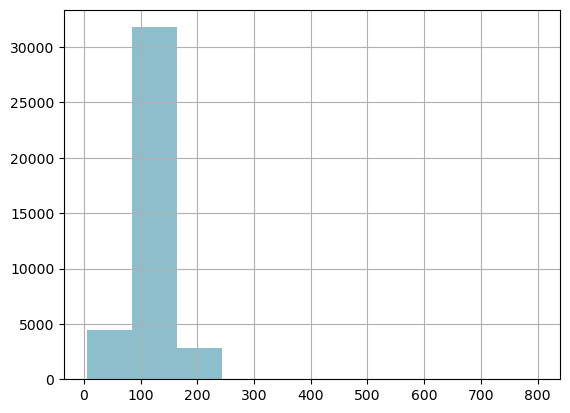

In [131]:
data['wait_time'].hist(color=(0.1, 0.5, 0.6, 0.5))

На основании диаграммы можно сделать вывод, что в среднем время ожидания было в интервале от 90 до 160 минут. Для того чтобы сделать диапазон меньше, сделаем диапазон графика меньше.

Ограничим график по оси x, указываем диапазон <code>range=(min, max)</code>

<AxesSubplot:>

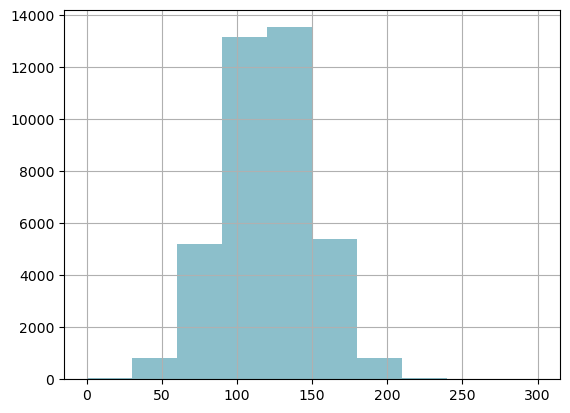

In [132]:
data['wait_time'].hist(range=(0, 300),color=(0.1, 0.5, 0.6, 0.5))

Теперь видно, что чаще всего время ожидая составляло от 125 до 150 минут.
Гистограмма похожа на нормальное распределение, теперь это лучше видно.
На первой гистограмме мы видели ось вплоть до 800 значений, но не видели значений. Что это означает?
Возможно, присутствуют единичные значения  в указанном диапазоне.
Посторим другой график - точечную диаграмму.<br>




<AxesSubplot:xlabel='region_name', ylabel='wait_time'>

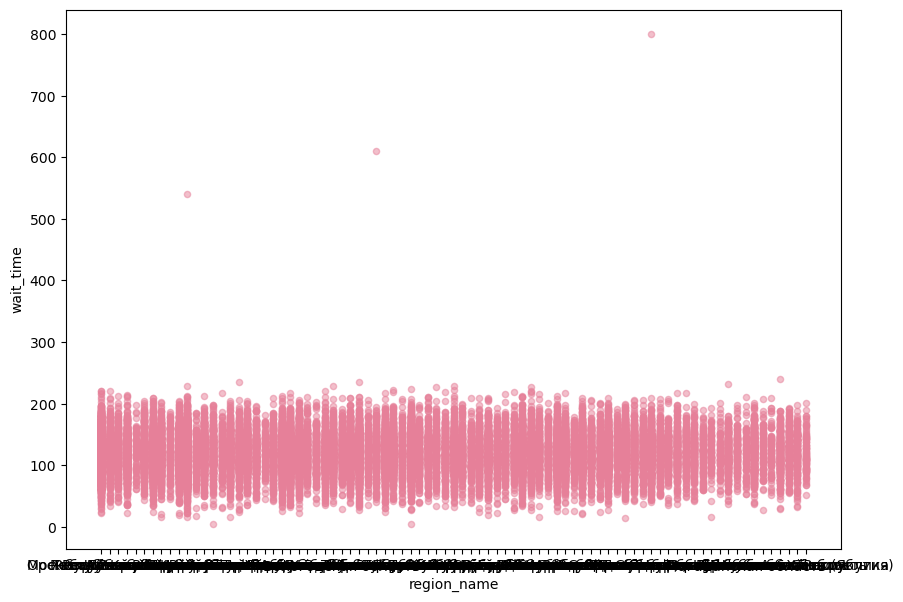

In [133]:
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 7),
          color=(0.9, 0.5, 0.6, 0.5))

По данному графику мы видим, что существуют единичные случаи ожидания (например, 800 минут), ониувеличивают диапазон и искажают данные, поэтому можно их проигнорировать.

Построим boxplot для времени ожидания

<AxesSubplot:>

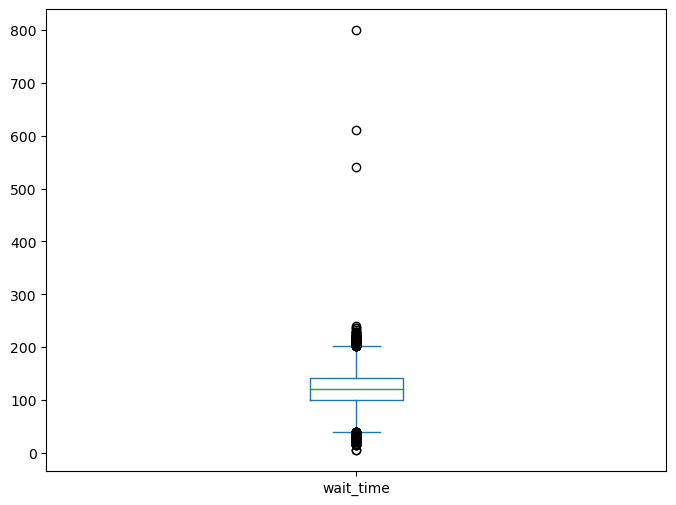

In [134]:
data['wait_time'].plot(kind='box', figsize=(8, 6)) 

В таком масштабе плохо виден сам ящик, зато мы видим хвост из выбросов  в диапазоне значений 0-40 и 200-250 и несколько 'экстремальных выбросов' за пределами 500 минут.
Увеличим масштаб.

<AxesSubplot:>

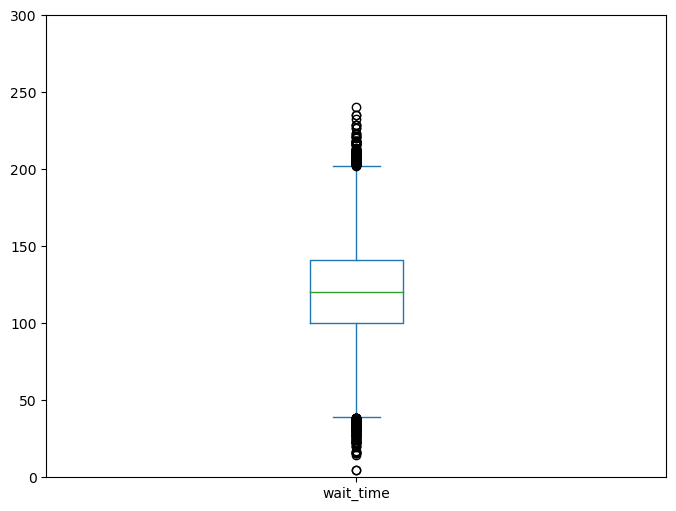

In [135]:
data['wait_time'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )

In [136]:
data['wait_time'].describe()

count    39085.000000
mean       120.405894
std         30.347460
min          4.748831
25%        100.007374
50%        120.524415
75%        140.796472
max        800.000000
Name: wait_time, dtype: float64

Так, мы получили среднее время ожидания равное 120 минутам, минимальное и максимальное время, а также квартили значений.


In [137]:
q75 = np.percentile(data['wait_time'], 75) # значение перцентиля из массива элементов с нужным нам диапазоном
q25 = np.percentile(data['wait_time'], 25) 
iqr = q75 - q25
ejection_h = q75+iqr*1.5
ejection_l = q25-iqr*1.5 

In [138]:
print (ejection_h, ejection_l)

201.9801186935365 38.823726829941734


Опредилим число выбросов.

In [139]:
n_ejection = data['wait_time'][(data['wait_time'] > ejection_h) | (data['wait_time'] < ejection_l)].count()
print('Число выбросов:', n_ejection)

Число выбросов: 259


In [140]:
# завернем все это в функцию
def ejection (col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75 - q25
    ejection_h = q75+iqr*1.5
    ejection_l = q25-iqr*1.5 
    ejection_count = data['wait_time'][(data['wait_time'] > ejection_h) | (data['wait_time'] < ejection_l)].count()
    ejection_perc = (ejection_count / data['wait_time'].count() * 100)
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [141]:
ejection('wait_time')

(201.9801186935365, 38.823726829941734, 259, 0.662658308814123)

Отлично сработано! Теперь мы знаем все значения, число элементов и процент значений в датасете.

In [142]:
# Выше мы нашли число выбросов, перевернем условия, чтобы отфильтровать датасет без них
good_data_wait_time = data[(data['wait_time'] < ejection('wait_time')[0]) & (data['wait_time'] > ejection('wait_time')[1])]
good_data_wait_time = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head(3)




,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


In [143]:
#Проверка
print (len(data) - len(good_data_wait_time))

259


<AxesSubplot:>

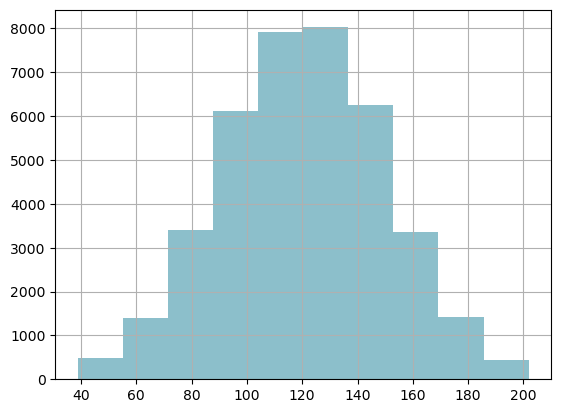

In [144]:
#изменение на графиках
good_data_wait_time['wait_time'].hist(color=(0.1, 0.5, 0.6, 0.5))

In [145]:
good_data_wait_time['wait_time'].describe()

count    38826.000000
mean       120.379495
std         29.160773
min         38.858157
25%        100.174698
50%        120.526717
75%        140.621013
max        201.878534
Name: wait_time, dtype: float64

<AxesSubplot:>

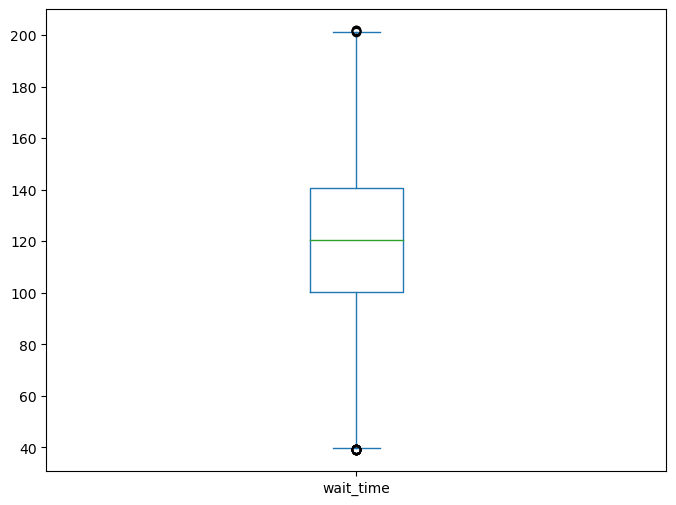

In [146]:
# построим box
good_data_wait_time['wait_time'].plot(kind='box',
                       figsize=(8, 6)
                      )

<AxesSubplot:xlabel='region_name', ylabel='wait_time'>

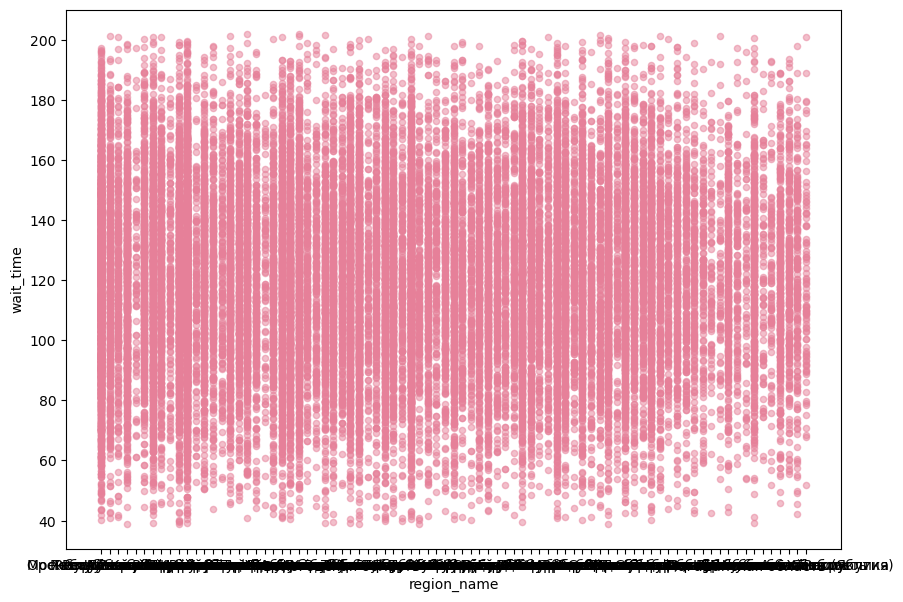

In [147]:
# построим scatter
good_data_wait_time.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 7),
          color=(0.9, 0.5, 0.6, 0.5))

Выбросы по признаку времени ожидания устранены. Данные готовы для проведения статистического анализа и/или построения модели прогноза времени ожидания сотрудников ДПС.

Проведем дополнительное миниисследование по этому вопросу.

Определим регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране.

In [148]:
grp = data.groupby('region_name')['wait_time'].mean()
grp = pd.DataFrame(grp)
grp['diff'] = grp['wait_time'] - data['wait_time'].mean()
grp['diff'] = grp['diff'].apply(lambda x: x * (-1) if x < 0 else x)
grp.pop('wait_time')
grp = grp.sort_values(by = 'diff', ascending=True)
grp

,diff
region_name,
Республика Калмыкия,0.016381
Тульская область,0.036356
Республика Северная Осетия — Алания,0.041726
Новосибирская область,0.047125
Республика Мордовия,0.049557
...,...
Алтайский край,3.029265
Ханты-Мансийский автономный округ — Югра,3.506836
Курганская область,3.815310


<AxesSubplot:title={'center':'Регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране'}, ylabel='Регион'>

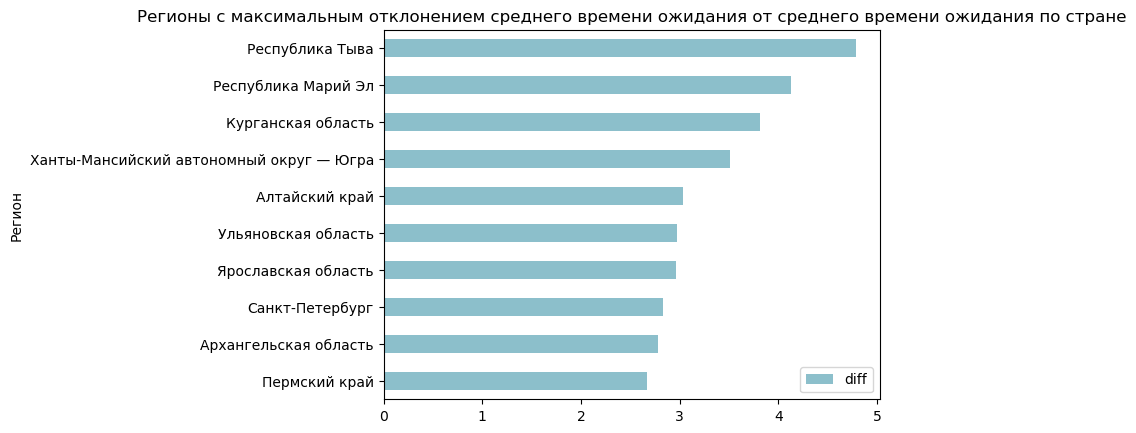

In [149]:
grp.tail(10).plot(kind='barh',color=(0.1, 0.5, 0.6, 0.5), title = 'Регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране',xlabel='Регион')

<AxesSubplot:>

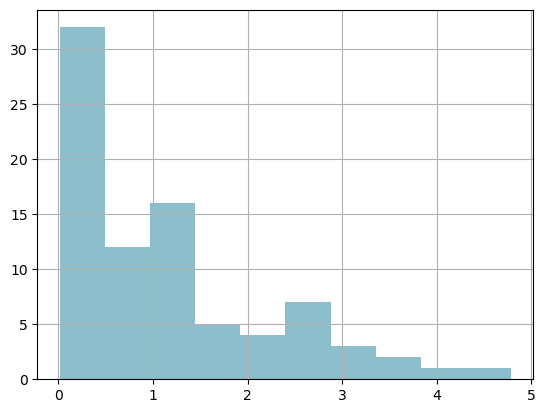

In [150]:
grp['diff'].hist(color=(0.1, 0.5, 0.6, 0.5))
#по оси абсцисс - значние показателя, по оси ординат - количество совпадений.

Выводы:
1.Среднеее отклонение в среднем составляет от 0 до 1 минут.
2.Наибольшее отклонение составляет около 5 минут, в Республике Тыва наибольшее отклонение = 4,78 минут.


<b> 6. Исследование числа участников ДТП

<AxesSubplot:>

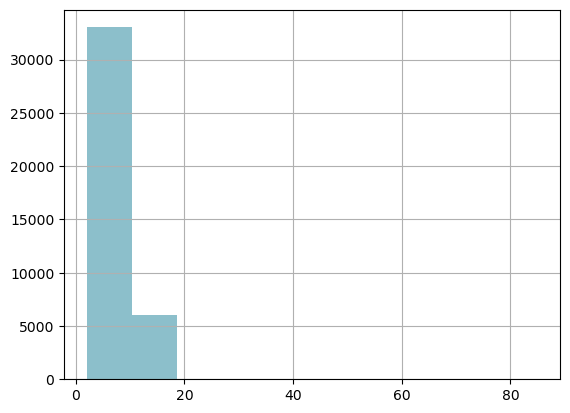

In [151]:
# построим гистограмму 'participants_amount'
data['participants_amount'].hist(color=(0.1, 0.5, 0.6, 0.5))

Единичные случаи увеличивают диапазон числа участников ДТП.

<AxesSubplot:>

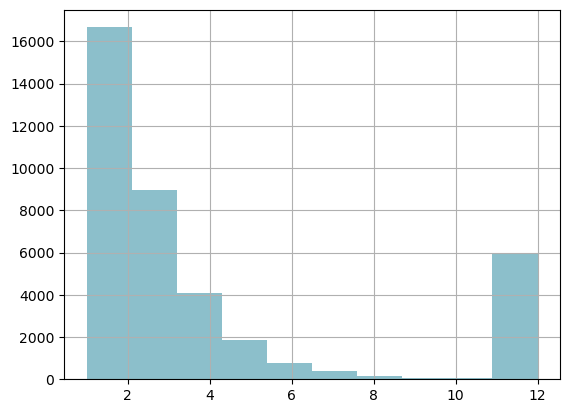

In [152]:
#добавим границы интервала
data['participants_amount'].hist(range=(1, 12),color=(0.1, 0.5, 0.6, 0.5))

Диапазон значений сузился, теперь очевидно, что наиболее часто встречающееся количество участников ДТП от 1 до 4 человек.

Построим точечную диаграмму

<AxesSubplot:xlabel='region_name', ylabel='participants_amount'>

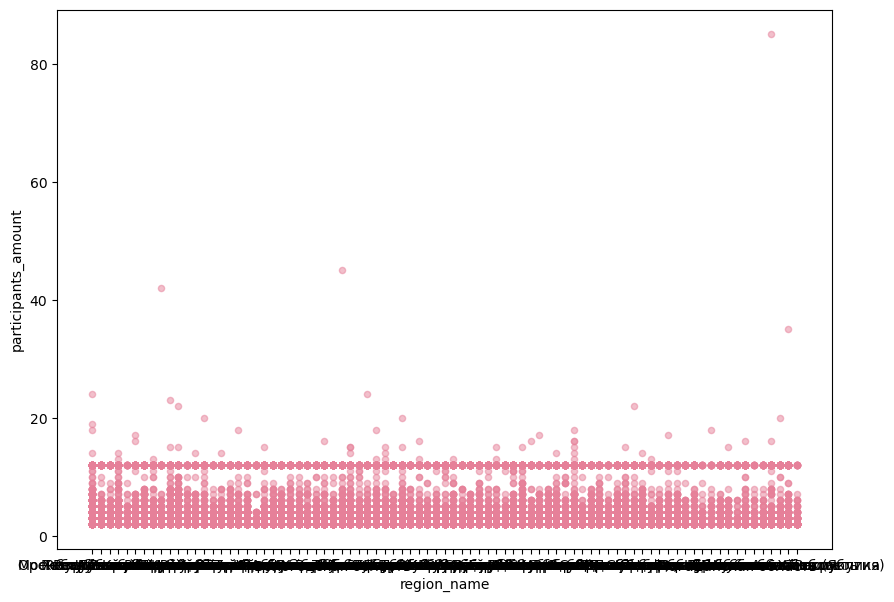

In [153]:
data.plot(kind='scatter',
          y='participants_amount',
          x='region_name',
          figsize=(10, 7),
          color=(0.9, 0.5, 0.6, 0.5))

Постоим график boxplot

<AxesSubplot:>

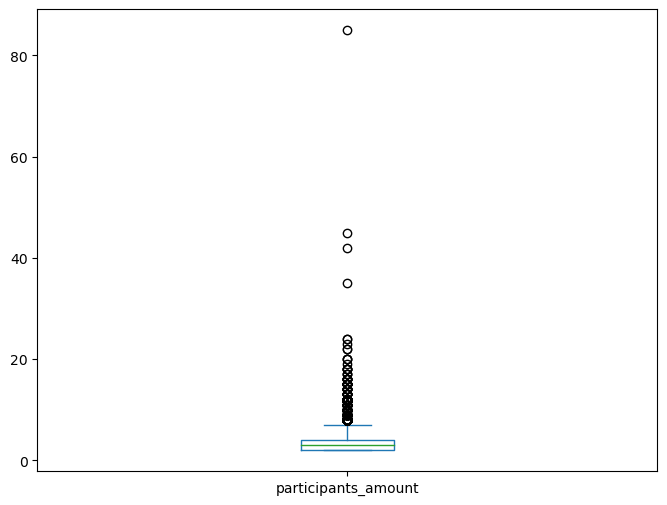

In [154]:
data['participants_amount'].plot(kind='box',
                       figsize=(8, 6)
                      )

<AxesSubplot:>

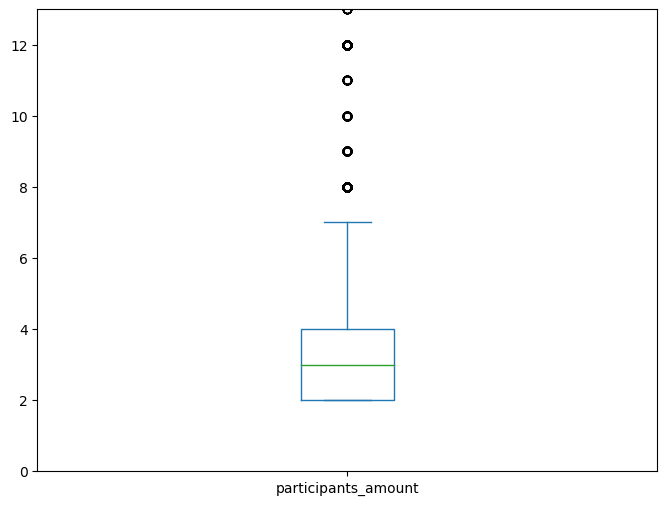

In [155]:
#Скорректируем ось y
data['participants_amount'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 13)
                      )

In [156]:
q75 = np.percentile(data['participants_amount'], 75)
q25 = np.percentile(data['participants_amount'], 25) 
iqr = q75 - q25
ejection_h = q75+iqr*1.5
ejection_l = q25-iqr*1.5 
print(iqr, q25, q75,ejection_h, ejection_l)


2.0 2.0 4.0 7.0 -1.0


Теперь хорошо виден сам ящик. Какие выводы мы можем сделать?
1. Медиана = 3
2. 25-й перцентиль = 2
3. 75-й перцентиль = 4
4. IQR = 2
5. Выбросы > 7


In [157]:
#замечаем, что нет нижнего уса.
data['participants_amount'].describe()

count    39085.000000
mean         4.316259
std          3.537298
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

In [158]:
ejection('participants_amount')

(7.0, -1.0, 39083, 99.99488294742228)

Устраним выбросы.

Почему получилось значение -1 ? Как это испраить?

Первым шагом определим границу значений, при percentile = 95.
Запишем значение в переменную

In [159]:
q95 = np.percentile(data['participants_amount'], 95)
q5 = np.percentile(data['participants_amount'], 5)
iqr = q95 - q5
participants_amount_ejection_h = q95 + iqr * 1.5
participants_amount_ejection_h
q5

2.0

In [160]:
#опредилим число выбросов
participants_amount_count = data['participants_amount'][(data['participants_amount'] > participants_amount_ejection_h) | (data['participants_amount'] < ejection_l)].count()
participants_amount_count

4

In [161]:
#определим процент выбросов
ejection_perc = (participants_amount_count / data['participants_amount'].count() * 100)
ejection_perc

0.010234105155430473

<AxesSubplot:>

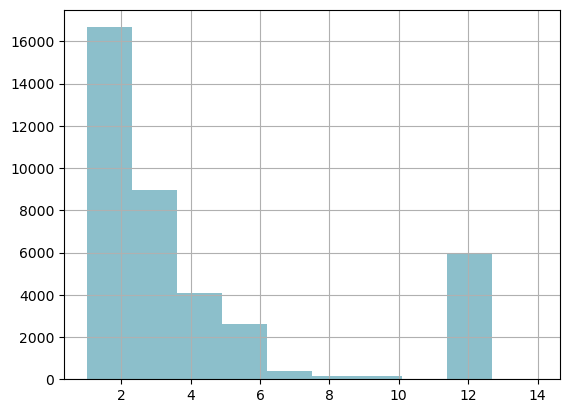

In [162]:
data['participants_amount'].hist(range=(1, 14),color=(0.1, 0.5, 0.6, 0.5))

Сформулируем промежуточные выводы:
По графику видно, что в значении погибших = 12 мы замечаем резкий всплеск. Данная ситуация настрораживает.


Удалим 'экстремальные' выбросы (перезапишем датасет).
Поищем ответ на вопрос, почему значения в таком объеме равны 12, в то время как соседние значения 11 и 13 представлены единичными случаями. Эта ситуация требует исследования.

In [163]:
#удаляем выбросы
data_new = data[(data['participants_amount'] > participants_amount_ejection_h)].reset_index(drop=True)
data_new.head()

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,4,Красноярский край,отсутствует,Ачинск-Ужур-Троицкое,Региональная или межмуниципальная дорога общег...,"СФО, Красноярский край, Назаровский район",Столкновение,20181214,20:30:00,Выезд на полосу встречного движения,27,4,3,45,2018-12-14 20:30:00,Пятница,127.673452
1,58,Псковская область,Р-23,Санкт-Петербург - Псков - Пустошка - Невель - ...,Федеральная дорога общего пользования,"СЗФО, Псковская область, Струго-Красненский район",Съезд с дороги,20180522,7:15:00,Другие нарушения ПДД водителями,46,0,1,85,2018-05-22 07:15:00,Вторник,148.152363
2,98,Республика Саха (Якутия),А-331,"""Вилюй"" Тулун - Братск - Усть-Кут - Мирный - Я...",Федеральная дорога общего пользования,"ДФО, Республика Саха (Якутия), Вилюйский улус,...",Столкновение,20180401,16:45:00,Нарушение правил расположения ТС на проезжей ч...,14,0,2,35,2018-04-01 16:45:00,Воскресенье,109.042544
3,79,Республика Адыгея,отсутствует,Подъезд к а.Вочепший,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Адыгея, Теучежский район",Наезд на животное,20180401,1:30:00,Другие нарушения ПДД водителями,0,1,1,42,2018-04-01 01:30:00,Воскресенье,116.329268


In [164]:
data[(data['participants_amount'] ==12)&(data['crash_type_name'] =='Столкновение')].head(30)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
693,71,Тюменская область,71А-2107,Ялуторовск - Ярково,Региональная или межмуниципальная дорога общег...,"УФО, Тюменская область, Ялуторовский район",Столкновение,20181228,10:12:00,Несоответствие скорости конкретным условиям дв...,7,0,6,12,2018-12-28 10:12:00,Пятница,112.148582
823,75,Челябинская область,М-5,"""Урал"" Москва - Рязань - Пенза - Самара - Уфа ...",Федеральная дорога общего пользования,"УФО, Челябинская область, Ашинский район",Столкновение,20181227,14:00:00,Нарушение правил расположения ТС на проезжей ч...,10,1,6,12,2018-12-27 14:00:00,Четверг,128.098687
2798,98,Республика Саха (Якутия),А-331,"""Вилюй"" Тулун - Братск - Усть-Кут - Мирный - Я...",Федеральная дорога общего пользования,"ДФО, Республика Саха (Якутия), Нюрбинский улус",Столкновение,20181215,10:00:00,Выезд на полосу встречного движения,7,0,2,12,2018-12-15 10:00:00,Суббота,94.576326
7296,94,Удмуртская Республика,М-7,Подъезд к городу Пермь от а/д М-7,Федеральная дорога общего пользования,"ПФО, Удмуртская Республика, Можгинский район",Столкновение,20181117,12:40:00,Выезд на полосу встречного движения,9,2,7,12,2018-11-17 12:40:00,Суббота,162.906640
12050,4,Красноярский край,отсутствует,Норильск-Алыкель,Региональная или межмуниципальная дорога общег...,"СФО, Красноярский край, Норильск",Столкновение,20181019,7:58:00,Выезд на полосу встречного движения,5,1,2,12,2018-10-19 07:58:00,Пятница,173.399981
13557,46,Московская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Московская область, Солнечногорский район...",Столкновение,20181010,15:10:00,Неправильный выбор дистанции,7,0,6,12,2018-10-10 15:10:00,Среда,105.793568
14618,19,Вологодская область,М-8,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",Федеральная дорога общего пользования,"СЗФО, Вологодская область, Сокольский район",Столкновение,20181004,10:00:00,Выезд на полосу встречного движения,9,3,3,12,2018-10-04 10:00:00,Четверг,104.238775
18909,44,Магаданская область,Р-504,"""Колыма"" Якутск - Магадан",Федеральная дорога общего пользования,"ДФО, Магаданская область, Хасынский",Столкновение,20180905,11:45:00,Выезд на полосу встречного движения,2,1,3,12,2018-09-05 11:45:00,Среда,156.904999
21399,82,Республика Дагестан,Р-217,"""Кавказ"" автомобильная дорога М-4 ""Дон"" - Влад...",Федеральная дорога общего пользования,"СКФО, Республика Дагестан, Дербентский район",Столкновение,20180821,20:35:00,Выезд на полосу встречного движения,4,11,3,12,2018-08-21 20:35:00,Вторник,84.040080
22858,25,Иркутская область,Р-258,"""Байкал"" Иркутск - Улан-Удэ - Чита",Федеральная дорога общего пользования,"СФО, Иркутская область, Шелеховский район",Столкновение,20180810,12:45:00,Выезд на полосу встречного движения,13,0,2,12,2018-08-10 12:45:00,Пятница,83.922141


In [165]:
data[data['participants_amount'] == 12]['crash_type_name'].value_counts()

Опрокидывание                                                                                                                     2980
Наезд на препятствие                                                                                                              1503
Съезд с дороги                                                                                                                    1221
Наезд на животное                                                                                                                  156
Наезд на стоящее ТС                                                                                                                 45
Иной вид ДТП                                                                                                                        29
Столкновение                                                                                                                        17
Наезд на внезапно возникшее препятствие                

Таким образом, ошибок в данных нет. Такой всплекс обоснован тем, что вероятнее всего в ДТП участвовали микроавтобусы, количество пассажиров в которых = 12, соответственно, все они являются участниками ДТП.

<b>7. Исследовать ДТП в ночное время суток.

Для того, чтобы провести исследование, проделаем следующие пункты:
1. Определим число наездов на пешехода в московской области.
2. Найдем, какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов включительно).Постром гистограмму числа ДТП по часам.
3. Построим гистограмму числа ДТП со смертельным исходом для столкновений по часам.
4. Используя срезы данных, сравним число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные дни.

In [166]:
#Определим число наездов на пешехода в московской области.
data.query('region_name == "Московская область" & crash_type_name == "Наезд на пешехода"')['region_name'].count()

535

In [167]:
#Найдем, какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов включительно).Постром гистограмму числа ДТП по часам.
data['hour'] = data['datetime'].dt.hour
per = data.query('hour > 0 & hour < 5')['hour'].count() / data['hour'].count() * 100 
print(f'В ночное время произошло {round(per, 2)} % всех ДТП')

В ночное время произошло 7.49 % всех ДТП


<AxesSubplot:>

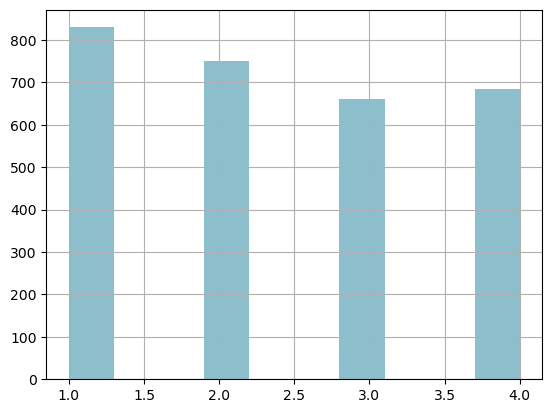

In [168]:
data.query('hour > 0 & hour < 5')['hour'].hist(color=(0.1, 0.5, 0.6, 0.5)) 
#детализируем по часам

<AxesSubplot:>

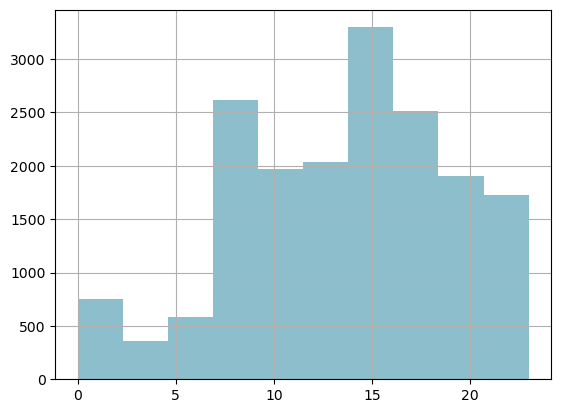

In [169]:
#Построим гистограмму числа ДТП со смертельным исходом для столкновений по часам
data.query('fatalities_amount > 0 & crash_type_name == "Столкновение"')['hour'].hist(color=(0.1, 0.5, 0.6, 0.5)) 
#как видно, наименьшее количество столкновений со смертельным исходом произошло в ночное время (по сравнению с утренними, дневными и вечерними часами)

Используя срезы данных, сравним число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные дни.


In [170]:
data_week = data.query('fatalities_amount > 0 & crash_date_day.isin(("Понедельник","Вторник","Среда","Четверг"))& hour > 0 & hour < 5').pivot_table(index='crash_date_day',
               aggfunc='count', 
               values='fatalities_amount')


<AxesSubplot:title={'center':'Число ДТП в будние дни'}, xlabel='День недели', ylabel='Число ДТП'>

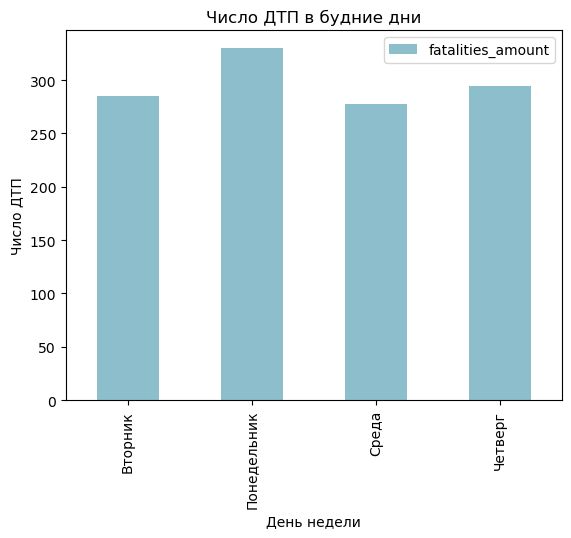

In [171]:
data_week.plot(kind = 'bar', xlabel='День недели',ylabel='Число ДТП',title='Число ДТП в будние дни',color=(0.1, 0.5, 0.6, 0.5))

In [172]:
data_weekends = data.query('fatalities_amount > 0 & crash_date_day.isin(("Пятница","Суббота","Воскресенье")) & hour > 0 & hour < 5').pivot_table(index='crash_date_day',
               aggfunc='count', 
               values='fatalities_amount')


<AxesSubplot:title={'center':'Число ДТП в выходные дни'}, xlabel='День недели', ylabel='Число ДТП'>

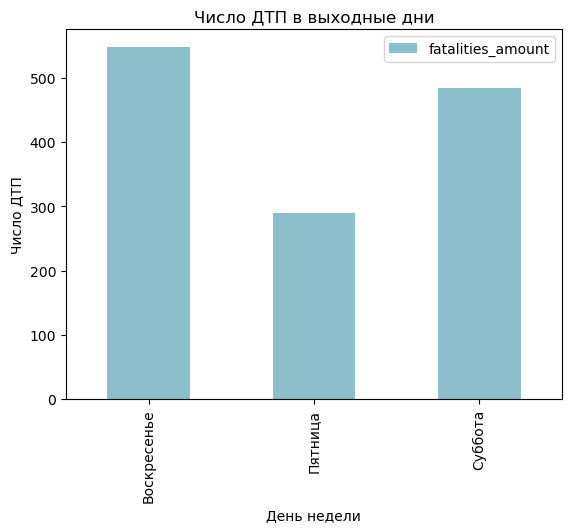

In [173]:
data_weekends.plot(kind = 'bar', xlabel='День недели',ylabel='Число ДТП',title='Число ДТП в выходные дни',color=(0.1, 0.5, 0.6, 0.5))

Становится очевидно, что наибольшее количество ДТП случалось по выходным и пятницам. Наибольшее количество ДТП в ночное время произошло в воскресенье.

<b>8. Определить наиболее опасные дороги.

1. Определим самую опасную дорогу в России (по числу погибших) (road_code) отдельно для двух разных типов дорог. (федеральной и региональной)
2. Определим дорогу, которая пересекает наибольшее число регионов. 
3. Определим регион с самым опасным участком дороги для найденной дороги, построим столбчатую диаграмму по числу ДТП.

In [174]:
#1
data_1 = data[data['road_type'] == "Региональная или межмуниципальная дорога общего пользования"]
data_1
data_1 = data_1.pivot_table(index='road_code',
                aggfunc='sum',
                values='fatalities_amount')
data_1 = data_1.sort_values(by = 'fatalities_amount', ascending=False).head(10)
data_1.reset_index(inplace=True)
data_1.drop(index=data_1.index [0], axis= 0 , inplace= True )
data_1.columns=['road_code','fatalities_amount_sum']
data_1

,road_code,fatalities_amount_sum
1,35А-002,216
2,03К-002,170
3,35А-001,167
4,87Р-001,153
5,22Р-0159,128
6,35К-003,120
7,08А-1,110
8,53К-2101000,102
9,35К-001,102


Самая опасная дорога в России (по числу погибших за 2018 год) для такого типа дороги как "Региональная или межмуниципальная дорога общего пользования" является 35А-002, число погибшик составило 216.

<AxesSubplot:title={'center':'Самые опасные дороги по числу погибших'}, xlabel='Дорога', ylabel='Количество погибших'>

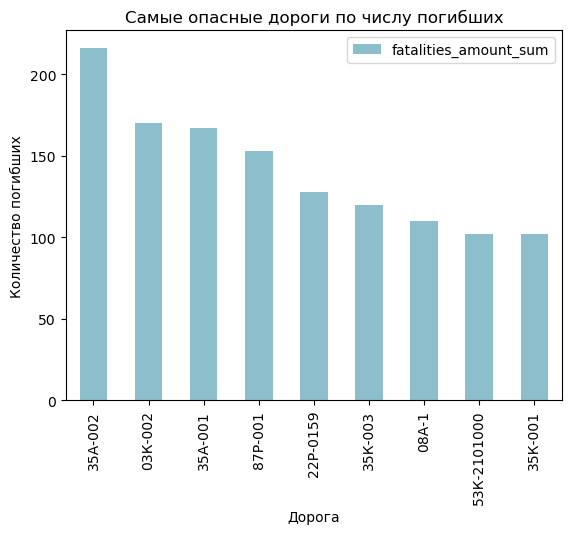

In [175]:
data_1.plot(kind='bar', x='road_code', y='fatalities_amount_sum',color=(0.1, 0.5, 0.6, 0.5),title='Самые опасные дороги по числу погибших', xlabel='Дорога',ylabel='Количество погибших')

In [176]:
#продолжение для другога типа дороги
data_2 = data[data['road_type'] == "Федеральная дорога общего пользования"]
data_2
data_2 = data_2.pivot_table(index='road_code',
                aggfunc='sum',
                values='fatalities_amount')
data_2 = data_2.sort_values(by = 'fatalities_amount', ascending=False).head(10)
data_2.reset_index(inplace=True)
data_2.columns=['road_code','fatalities_amount_sum']
data_2

,road_code,fatalities_amount_sum
0,М-7,1933
1,М-5,1922
2,М-4,1629
3,Р-217,1614
4,Р-255,918
5,Р-22,839
6,М-2,773
7,М-8,753
8,М-10,671
9,Р-228,510


Самая опасная дорога в России (по числу погибших за 2018 год) для такого типа дороги как "Федеральная дорога общего пользования" является М-7, число погибшик составило 1888.

<AxesSubplot:title={'center':'Самые опасные дороги по числу погибших'}, xlabel='Дорога', ylabel='Количество погибших'>

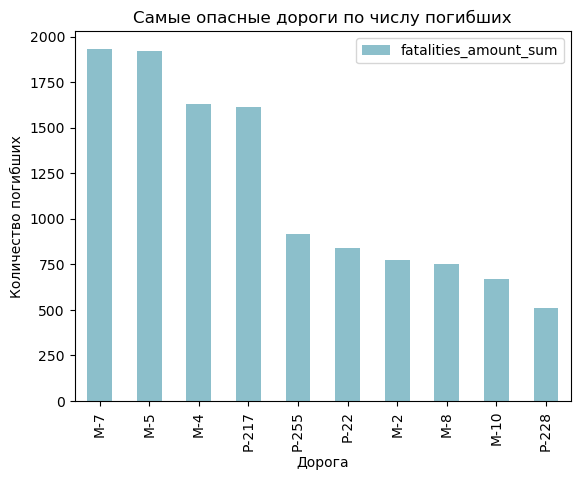

In [177]:
data_2.plot(kind='bar', x='road_code', y='fatalities_amount_sum', color=(0.1, 0.5, 0.6, 0.5),title='Самые опасные дороги по числу погибших', xlabel='Дорога',ylabel='Количество погибших')

In [178]:
#2
data_reg = data.pivot_table(index='road_code',
                aggfunc='nunique',
                values='region_name')
data_reg = data_reg.sort_values(by = 'region_name', ascending=False).head(11)
data_reg.reset_index(inplace=True)
data_reg.drop(index=data_reg.index [0], axis= 0 , inplace= True )
data_reg.columns=['road_code','count_region']
data_reg

,road_code,count_region
1,М-5,11
2,М-7,9
3,Р-217,9
4,Р-22,9
5,М-4,7
6,М-2,6
7,М-8,6
8,Р-255,5
9,М-3,5
10,Р-254,5


<AxesSubplot:title={'center':'Дороги, проходящие наибольшее количество регионов'}, xlabel='Дорога', ylabel='Количество регионов'>

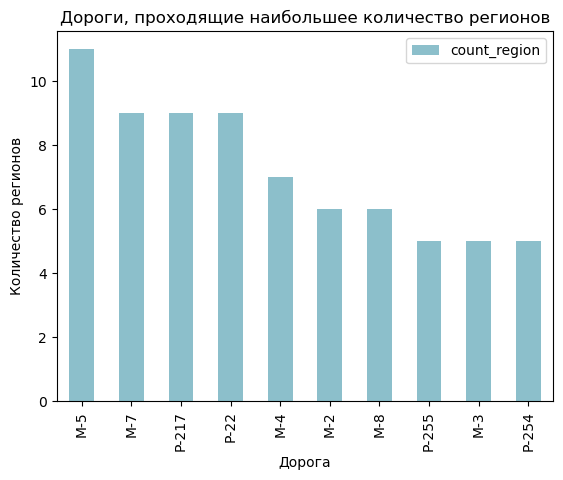

In [179]:
data_reg.plot(kind='bar', x='road_code', y='count_region', color=(0.1, 0.5, 0.6, 0.5),title='Дороги, проходящие наибольшее количество регионов', xlabel='Дорога',ylabel='Количество регионов')

Как видно, дорога М-5 пересекает наибольшее число регионов = 11.

In [180]:
#3
data_3 = data.query('road_code == "М-5"')
data_3
data_3 = data_3.pivot_table(index='region_name',
                aggfunc='count',
                values='fatalities_amount')
data_3 = data_3.sort_values(by = 'fatalities_amount', ascending=False)
data_3.reset_index(inplace=True)
data_3

,region_name,fatalities_amount
0,Самарская область,215
1,Пензенская область,176
2,Рязанская область,171
3,Челябинская область,167
4,Республика Башкортостан,128
5,Республика Мордовия,88
6,Оренбургская область,87
7,Московская область,66
8,Ульяновская область,55
9,Свердловская область,19


<AxesSubplot:title={'center':'Регионы с самым опасным участком дороги для найденной дороги'}, xlabel='Регион', ylabel='Количество погибших'>

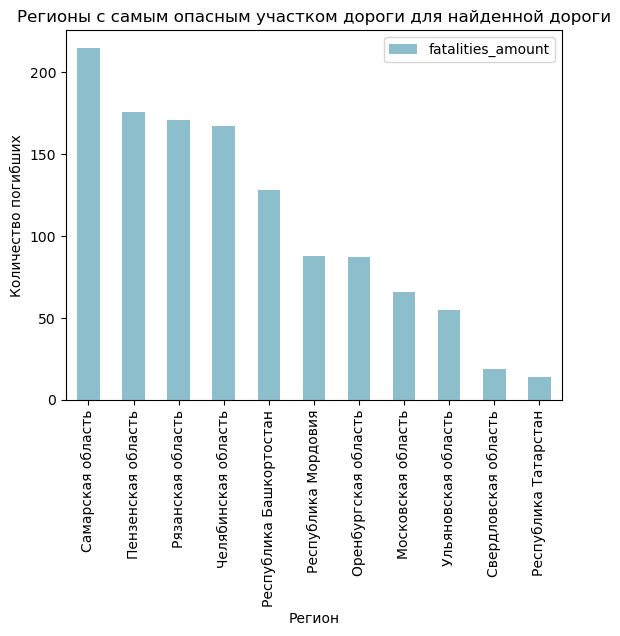

In [181]:
data_3.plot(kind='bar', x='region_name', y='fatalities_amount', color=(0.1, 0.5, 0.6, 0.5),title='Регионы с самым опасным участком дороги для найденной дороги', xlabel='Регион',ylabel='Количество погибших')

Дорога M-5 проходит через несколько регионов, наибольшее количество ДТП на данной дороге произошло в Самарской области, количество погибших составило 365 человек.

Проведем еще одно дополнительное исследование.
1. Для топ-10 дорог пересекающих разные регионы определим суммарное число погибших, участников ДТП (participants_amount).
2. Построим столбчатую диаграмму числа ДТП для определенных в п.1 дорог по регионам. (визуализируем только топ-10 регионов по числу ДТП)
3. Для каждой дороги из п.1 постоим столбчатую диаграмму распределения числа ДТП по регионам.

In [182]:
#1 Для топ-10 дорог пересекающих разные регионы определим суммарное число погибших, участников ДТП
top = data_reg['road_code'].unique().tolist()
data_new = data.query('road_code == @top')
top

['М-5', 'М-7', 'Р-217', 'Р-22', 'М-4', 'М-2', 'М-8', 'Р-255', 'М-3', 'Р-254']

In [183]:
#1
data_new = data_new.pivot_table(index='road_code',
                aggfunc='sum',
                values=['fatalities_amount','participants_amount'])
data_new = data_new.sort_values(by = 'fatalities_amount', ascending=False)
data_new.reset_index(inplace=True)
data_new.columns=['road_code','fatalities_amount_sum', 'participants_amount_sum']
data_new

,road_code,fatalities_amount_sum,participants_amount_sum
0,М-7,1933,4818
1,М-5,1922,4744
2,М-4,1629,4018
3,Р-217,1614,3860
4,Р-255,918,2409
5,Р-22,839,2068
6,М-2,773,1875
7,М-8,753,1891
8,Р-254,468,1188
9,М-3,452,1174


Таким образом, наибольшее число погибших = 1933 зарегестрировано на дороге М-7, как и число пострадавших = 4818.

In [184]:
#2 - определим топ регионов по числу ДТП
top_r = data.pivot_table(index='region_name',
                aggfunc='count',
                values='fatalities_amount')
top_r = top_r.sort_values(by = 'fatalities_amount', ascending=False).head(10)
top_r.reset_index(inplace=True)
top_reg = top_r['region_name'].tolist()
top_reg

['Московская область',
 'Краснодарский край',
 'Ленинградская область',
 'Республика Башкортостан',
 'Ставропольский край',
 'Ростовская область',
 'Москва',
 'Республика Татарстан',
 'Владимирская область',
 'Красноярский край']

<AxesSubplot:title={'center':'Топ 10 регионов по числу ДТП'}, xlabel='Регион', ylabel='Число ДТП'>

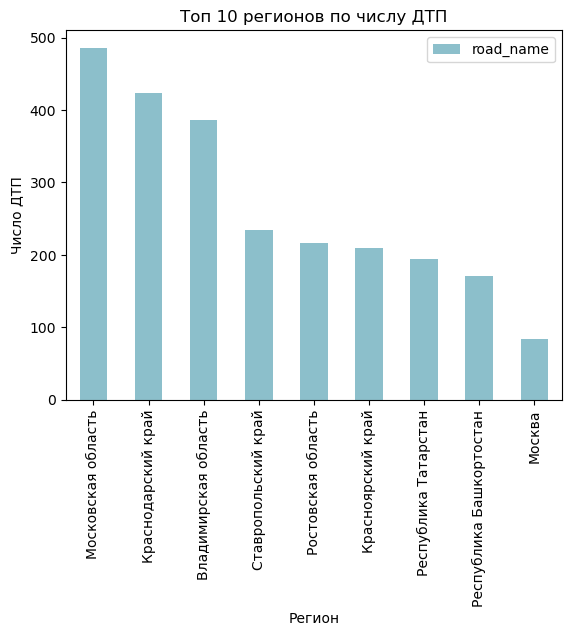

In [185]:
#2
data_new_2 = data.query('region_name == @top_reg & road_code == @top')
data_new_2 = data_new_2.pivot_table(index='region_name',
                aggfunc='count',
                values='road_name')
data_new_2 = data_new_2.sort_values(by = 'road_name', ascending=False).head(10)
data_new_2.reset_index(inplace=True)
data_new_2.plot(kind='bar', x='region_name', color=(0.1, 0.5, 0.6, 0.5),title='Топ 10 регионов по числу ДТП', xlabel='Регион',ylabel='Число ДТП')

Таким образом, Московская область возглавляет топ 10 регионов по числу ДТП среди выделенных в 1 пункте дорог.

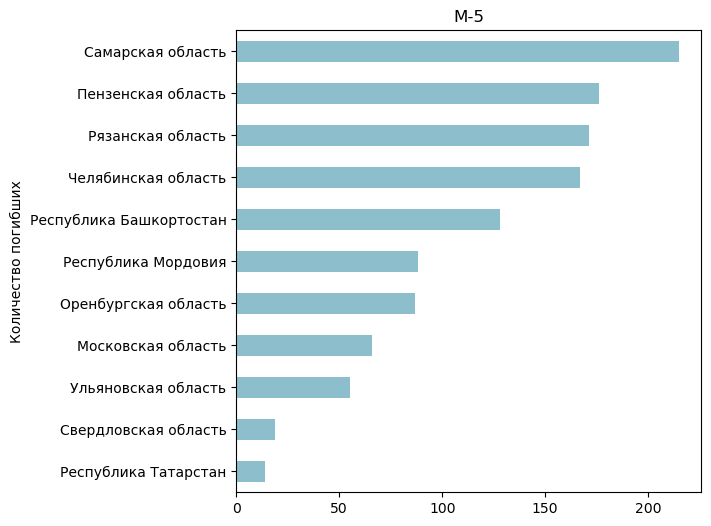

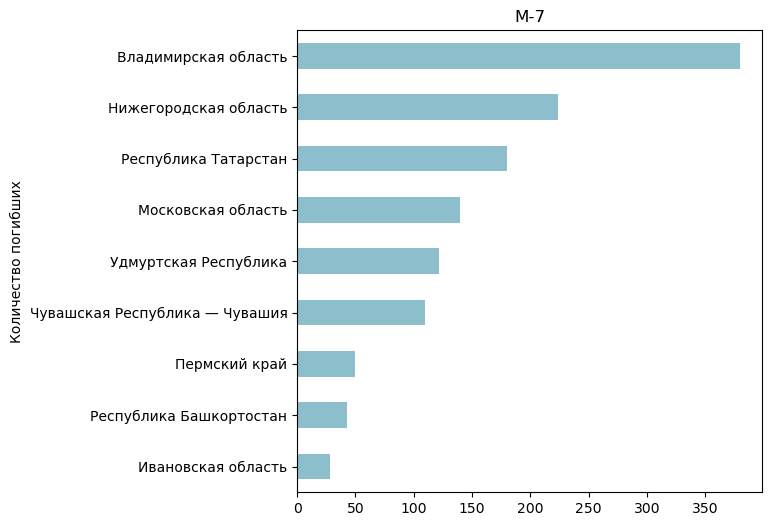

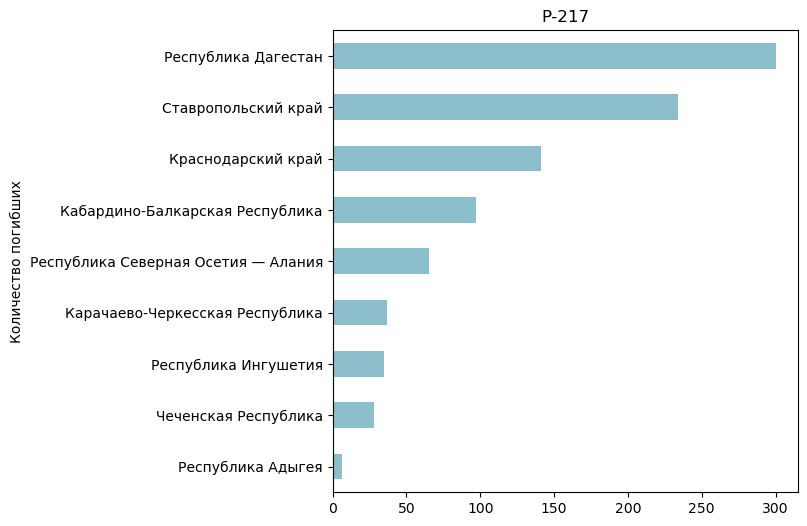

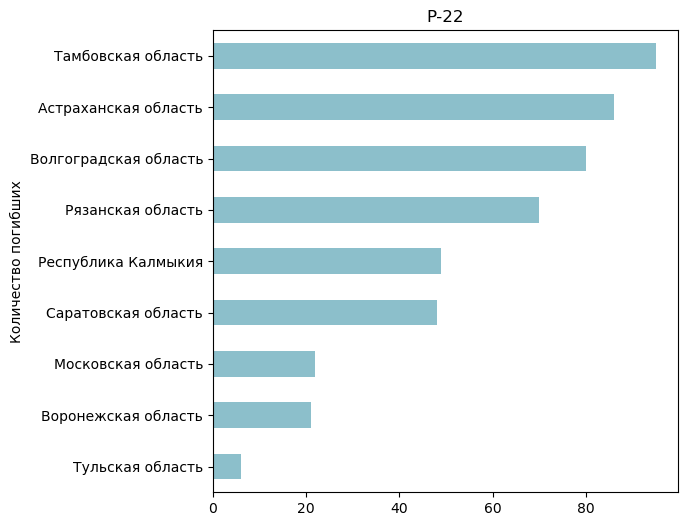

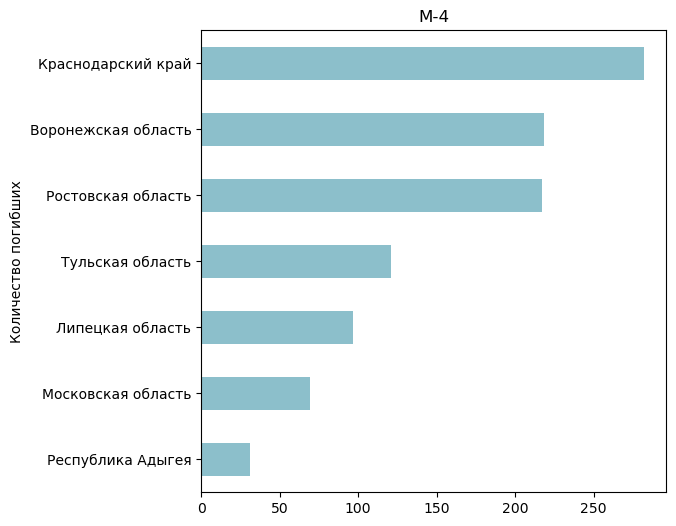

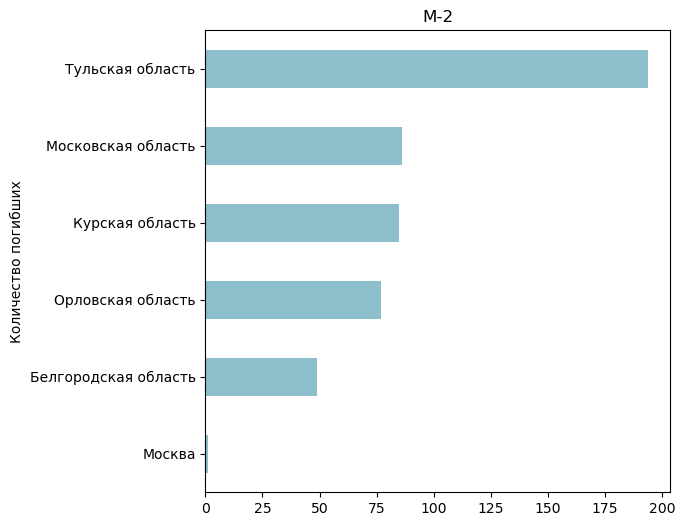

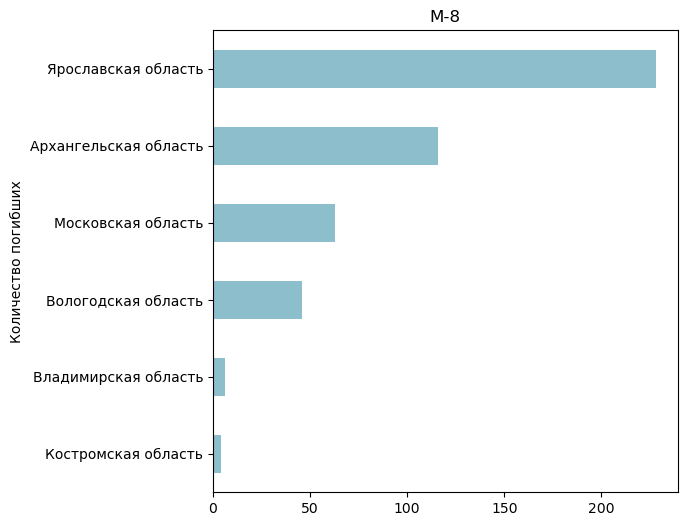

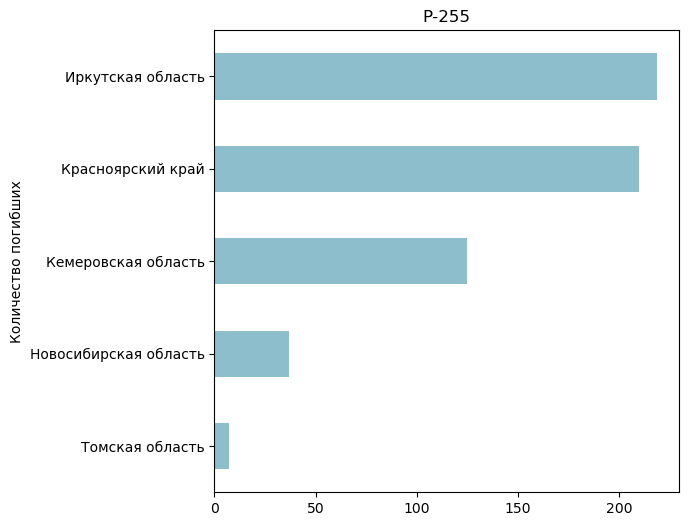

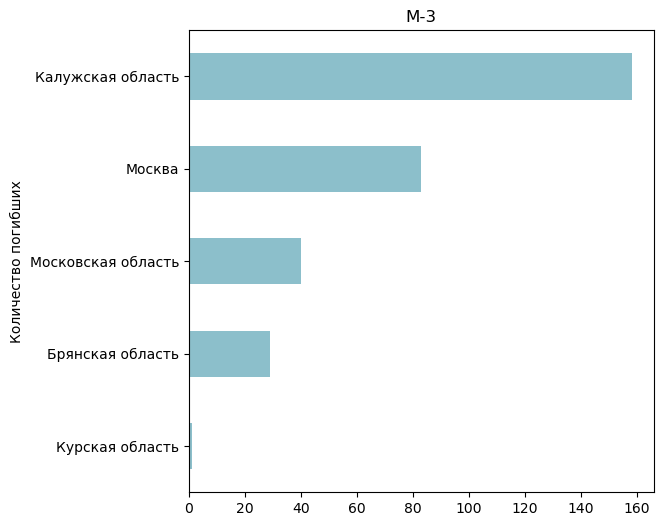

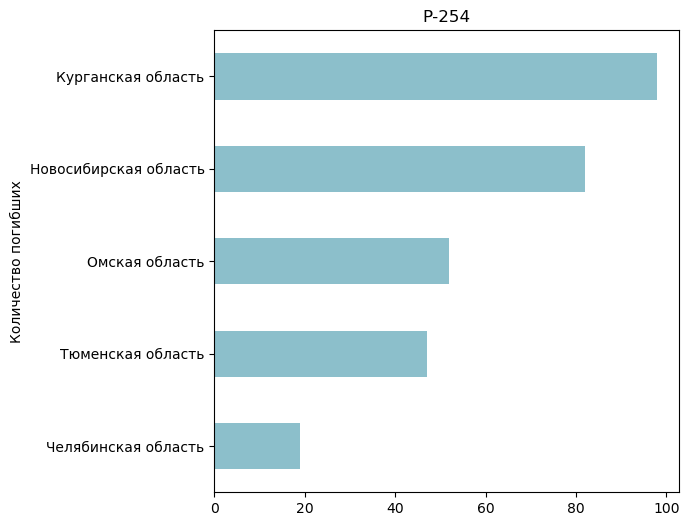

In [186]:
#3 Для каждой дороги из п.1 постоим столбчатую диаграмму распределения числа ДТП по регионам.
top = data_reg['road_code'].unique().tolist()
for i in top:
    data.query('road_code == @i')['region_name'].value_counts().sort_values(ascending=True).plot(kind='barh',
    x='region_name',
    title=i,
    figsize=(6,6),
    color=(0.1, 0.5, 0.6, 0.5), ylabel='Регион',xlabel='Количество погибших')
    plt.show()

# Заключение:

В ходе данной работы были проанализированы основные данные о ДТП в России за 2018 год, содержащиеся в данной таблице.Данный анализ является основой для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети. В ходе каждого раздела был сделал микровывод, на основании которого можно сделать определенный вывод о ситуации.
